## Used Car Price Prediction

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Exploratory Data Analysis

In [40]:
## Dataset Exploration

db = pd.read_csv('used_cars.csv')

print(" -------- Info -------- ")
print(db.info())
print(" -------- Describe -------- ")
print(db.describe()) ## Statistics for int columns
print(" -------- Null values Column -------- ")
print(db.isnull().sum())
print(" -------- Unique Values Column -------- ")
print(db.nunique())
print(" -------- Duplicate Rows -------- ")
print(db.duplicated().sum())


 -------- Info -------- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB
None
 -------- Describe -------- 
        model_year
count  4009.000000
mean   2015.515590
std       6.104816
min    1974.000000
25%    2012.000000
50%    2017.000000
75%    2020.000000
max    2024.000000
 -------- Null values 

In [41]:
# Remove currency symbols and commas
db['price'] = db['price'].str.replace('$', '')
db['price'] = db['price'].str.replace(',', '')

# Convert to float
db['price'] = pd.to_numeric(db['price'], errors='coerce')

# Remove mi. and commas
db['milage'] = db['milage'].str.replace('mi.', '')
db['milage'] = db['milage'].str.replace(',', '')

# Convert to float
db['milage'] = pd.to_numeric(db['milage'], errors='coerce')

## Handle Missing values
categorical_cols = ['fuel_type', 'accident', 'clean_title']

for col in categorical_cols:
    db[col].fillna(db[col].mode()[0], inplace=True)


print(" -------- Info -------- ")
print(db.info())
print(" -------- Describe -------- ")
print(db.describe()) ## Statistics for int columns
print(" -------- Null values Column -------- ")
print(db.isnull().sum())
print(" -------- Unique Values Column -------- ")
print(db.nunique())
print(" -------- Duplicate Rows -------- ")
print(db.duplicated().sum())

      brand                            model  model_year  milage  \
0      Ford  Utility Police Interceptor Base        2013   51000   
1   Hyundai                     Palisade SEL        2021   34742   
2     Lexus                    RX 350 RX 350        2022   22372   
3  INFINITI                 Q50 Hybrid Sport        2015   88900   
4      Audi        Q3 45 S line Premium Plus        2021    9835   

       fuel_type                                             engine  \
0  E85 Flex Fuel  300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...   
1       Gasoline                               3.8L V6 24V GDI DOHC   
2       Gasoline                                     3.5 Liter DOHC   
3         Hybrid  354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...   
4       Gasoline                         2.0L I4 16V GDI DOHC Turbo   

        transmission                 ext_col int_col  \
0        6-Speed A/T                   Black   Black   
1  8-Speed Automatic         Moonlight Cloud    Gray

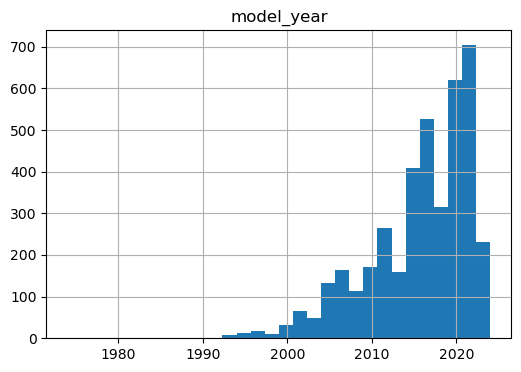

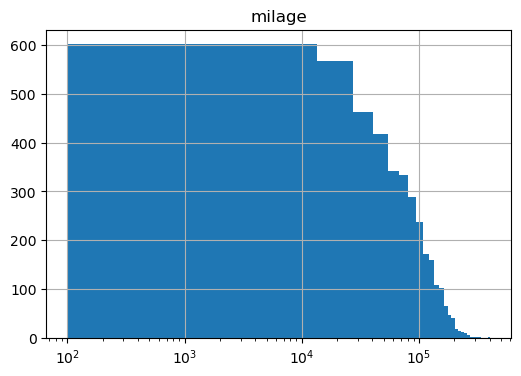

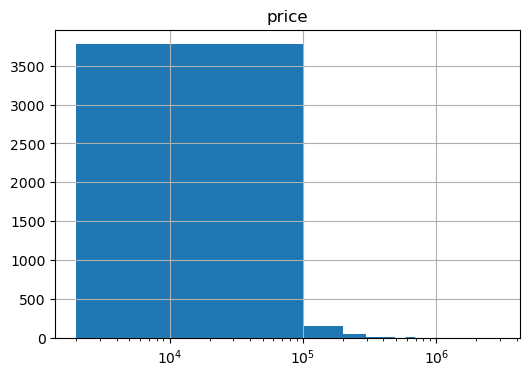

In [36]:
## Plot histograms for numerical values
numeric_cols = ['model_year', 'milage', 'price']

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    db[col].hist(bins=30)

    if col in ['price', 'milage']:
        plt.xscale('log')
    plt.title(f'{col}')

    plt.show()


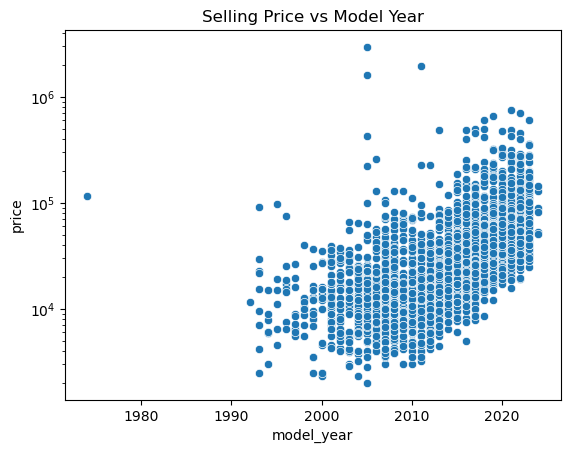

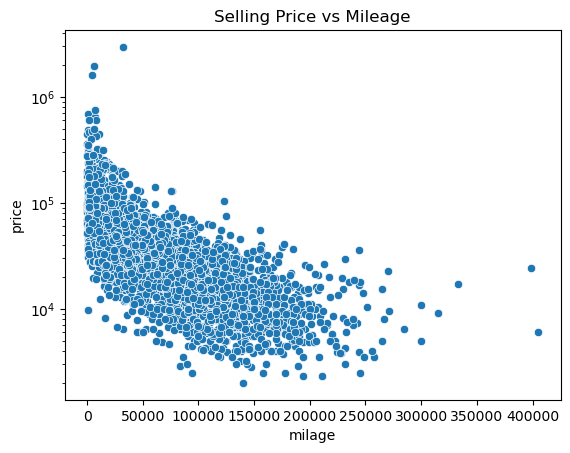

In [38]:
## Scatter plots : Selling prices vs other features

sns.scatterplot(data=db, x='model_year', y='price')
plt.yscale('log')
plt.title('Selling Price vs Model Year')
plt.show()

sns.scatterplot(data=db, x='milage', y='price')
plt.yscale('log')
plt.title('Selling Price vs Mileage')
plt.show()

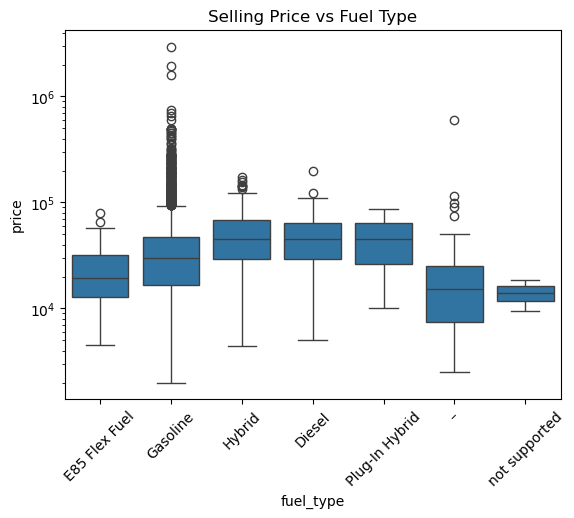

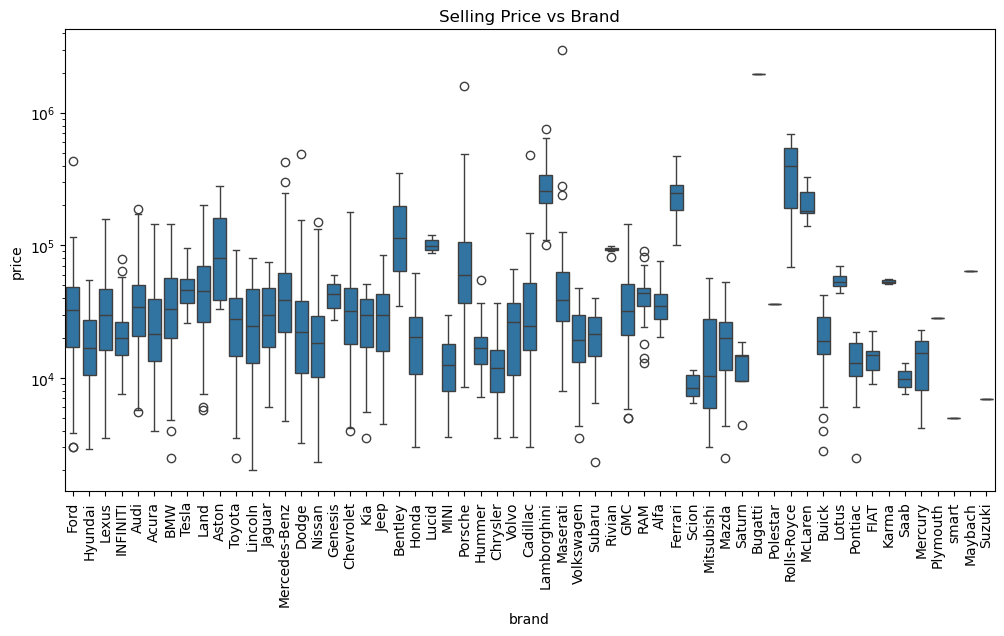

In [39]:
# Boxplots: Selling prices vs other features
sns.boxplot(data=db, x='fuel_type', y='price')
plt.yscale('log')
plt.title('Selling Price vs Fuel Type')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12,6))
plt.yscale('log')
sns.boxplot(data=db, x='brand', y='price')
plt.title('Selling Price vs Brand')
plt.xticks(rotation=90)
plt.show()
